In [9]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 2000)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")


In [3]:
ls

2275596.csv
Demographic_Statistics_By_Zip_Code.csv
JC-202008-citibike-tripdata.csv
JC-202008-citibike-tripdata.csv (1).zip
Landmark_data.csv
MedianZIP-3.xlsx
NYC_Transit_Subway_Entrance_And_Exit_Data.csv
NYPD_Arrest_Data__Year_to_Date_.csv
NYPD_Arrests_Data__Historic_.csv
NYPD_Shooting_Incident_Data__Historic_.csv
NYPD_Shooting_Incident_Data__Year_To_Date_.csv
Neighborhood Tabulation Areas (NTA).geojson
PATH_stations.csv
README.md
arrest.p
citi_nearest_distances.csv
citi_weather.csv
daily_weather.numbers*
demo_2018_acs5yr_nta (1).xlsx
df_arrests_cleaned_nozip.csv
df_ready_for_eda.csv
df_total_income.csv
distance_to_MTA.csv
distance_to_publictrans.csv
econ_2018_acs5yr_nta (1).xlsx
final_data.csv
shootings_zipcodes.csv
station_data.csv
unique_station_zip_loc.csv


In [288]:
df = pd.read_csv('df_ready_for_eda.csv')

In [289]:
df.shape

(815632, 25)

In [290]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [291]:
# Modfying zipcode to the correct format
df.citi_zipcode = df.citi_zipcode.astype(str)
df.citi_zipcode = df.citi_zipcode.apply(lambda x: x[0:5])
df.citi_zipcode = df.citi_zipcode.apply(lambda x: x.strip('.'))
df.citi_zipcode = df.citi_zipcode.apply(lambda x: '0'+ x if x.startswith('7') else x)

In [292]:
df.head()

,date,station_id,tripduration,time,citi_station_name,citi_station_lat,citi_station_lon,citi_zipcode,PRCP,TAVG,dist_mta,train_name,train_lat,train_lon,landmark,landmark_lat,landmark_lon,dist_landmark,Median,Mean,Pop,rider,day,weekend
0,2019-08-01,3192,261.0,00:19:17.4780,Liberty Light Rail,40.711242,-74.055701,07302,0.0,79.0,0.022601,Journal Square,40.7327,-74.0628,Paulus Hook Park,40.758,-74.0374,0.050212,76967.05,98752.3753,31104.0,1,Thursday,0
1,2019-08-01,3186,172.0,00:25:59.1480,Grove St PATH,40.719586,-74.043117,07302,0.0,79.0,0.008522,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.038837,76967.05,98752.3753,31104.0,1,Thursday,0
2,2019-08-01,3203,525.0,00:32:13.7000,Hamilton Park,40.727596,-74.044247,07302,0.0,79.0,0.008459,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.031166,76967.05,98752.3753,31104.0,1,Thursday,0
3,2019-08-01,3185,219.0,00:36:15.2730,City Hall,40.717733,-74.043845,07302,0.0,79.0,0.010270,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.040780,76967.05,98752.3753,31104.0,1,Thursday,0
4,2019-08-01,3272,262.0,00:45:49.3530,Jersey & 3rd,40.723332,-74.045953,07302,0.0,79.0,0.009749,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.035708,76967.05,98752.3753,31104.0,1,Thursday,0


In [293]:
# Looking at total ridership over the past year by zipcode
df.groupby(['citi_zipcode'])['rider'].sum()

citi_zipcode
07087      4327
07302    500994
07304     50956
07305      2951
07306     90948
07307     17977
07310     76796
07311     70514
10001        11
10003        15
10004         6
10005         5
10007         7
10011         2
10012         3
10013         5
10014        10
10016         3
10019         9
10022         1
10027         7
10032        16
10037         1
10038         7
10039         1
10045         3
10055         1
10107         1
10115         2
10280         1
10282         9
11201         3
11205         1
11208         1
11216         1
11231         1
nan          36
Name: rider, dtype: int64

In [294]:
# Most of our ridership over the past year occurred in Jersey City and the adjacent area. We're not sure why
# our dataset included so little data on NYC bike stations, but it's likely that we'll drop stations with fewer
# than 30 observations in the past year (all of NYC stations).

# Average daily ridership by zipcode
df.groupby(['citi_zipcode', 'date'])['rider'].sum().mean(level='citi_zipcode')

citi_zipcode
07087      11.356955
07302    1258.778894
07304     128.352645
07305       7.664935
07306     228.512563
07307      45.282116
07310     192.954774
07311     177.617128
10001       1.100000
10003       1.500000
10004       2.000000
10005       1.250000
10007       1.400000
10011       2.000000
10012       1.000000
10013       1.250000
10014       1.111111
10016       1.000000
10019       1.125000
10022       1.000000
10027       1.750000
10032       1.600000
10037       1.000000
10038       1.166667
10039       1.000000
10045       1.000000
10055       1.000000
10107       1.000000
10115       2.000000
10280       1.000000
10282       1.000000
11201       1.000000
11205       1.000000
11208       1.000000
11216       1.000000
11231       1.000000
nan         1.500000
Name: rider, dtype: float64

In [295]:
# Removing NYC zipcodes (and stations in them)
df = df[~df.citi_zipcode.str.startswith("1")]
df = df[df['citi_zipcode']!='nan']
df.shape

(815463, 24)

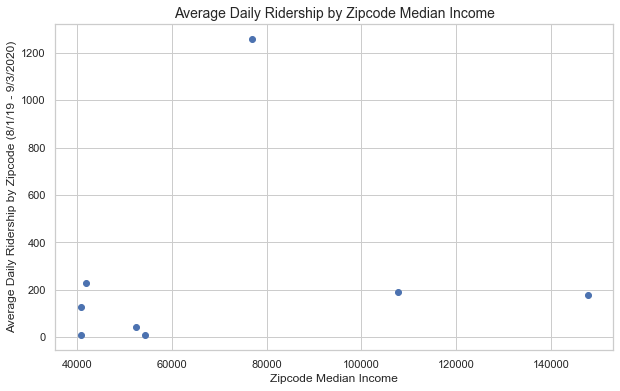

In [296]:
# Visualizing realtionship between average daily ridership and median income in a docking station's zip code
x = df.groupby(['citi_zipcode'])['Median'].median()
y = df.groupby(['citi_zipcode', 'date'])['rider'].sum().mean(level='citi_zipcode')

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x,y)
ax.set_title('Average Daily Ridership by Zipcode Median Income', fontsize = 14)
ax.set_xlabel('Zipcode Median Income')
ax.set_ylabel('Average Daily Ridership by Zipcode (8/1/19 - 9/3/2020)')
plt.show()

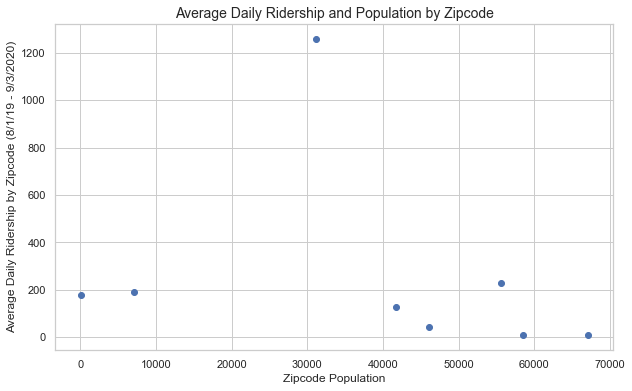

In [297]:
# Visualizing the relationship between average daily ridership and population
x = df.groupby(['citi_zipcode'])['Pop'].median()
y = df.groupby(['citi_zipcode', 'date'])['rider'].sum().mean(level='citi_zipcode')

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x,y)
ax.set_title('Average Daily Ridership and Population by Zipcode', fontsize = 14)
ax.set_xlabel('Zipcode Population')
ax.set_ylabel('Average Daily Ridership by Zipcode (8/1/19 - 9/3/2020)')
plt.show()

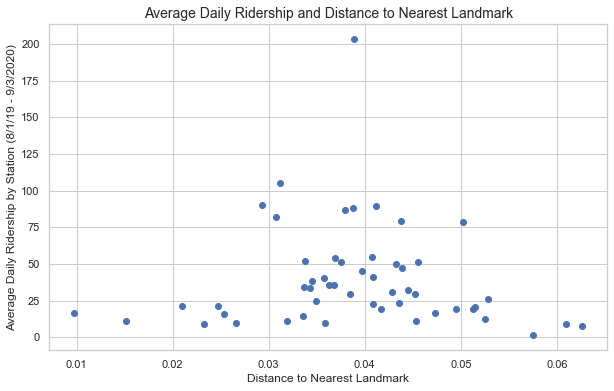

In [298]:
# Visualizing the relationship between distance to landmarks and average daily ridership
x = df.groupby(['station_id'])['dist_landmark'].median()
y = df.groupby(['station_id', 'date'])['rider'].sum().mean(level='station_id')

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x,y)
ax.set_title('Average Daily Ridership and Distance to Nearest Landmark', fontsize = 14)
ax.set_xlabel('Distance to Nearest Landmark')
ax.set_ylabel('Average Daily Ridership by Station (8/1/19 - 9/3/2020)')
plt.show()

In [299]:
# Exploring the outlier
df.groupby(['station_id'])['dist_landmark'].median()

station_id
3184    0.043861
3185    0.040780
3186    0.038837
3187    0.036882
3191    0.061002
3192    0.050212
3193    0.052884
3194    0.044498
3195    0.037914
3196    0.015186
3198    0.009770
3199    0.029262
3201    0.035821
3202    0.030781
3203    0.031166
3205    0.043229
3206    0.033569
3207    0.025365
3209    0.036329
3210    0.021020
3211    0.037546
3212    0.026628
3213    0.040838
3214    0.045235
3220    0.031927
3225    0.043557
3267    0.045595
3268    0.051299
3269    0.034525
3270    0.033716
3272    0.035708
3273    0.036761
3275    0.039674
3276    0.043753
3277    0.052515
3278    0.034263
3279    0.038480
3280    0.051436
3281    0.023260
3426    0.057543
3481    0.041670
3483    0.040904
3638    0.033727
3639    0.038748
3640    0.034957
3677    0.045389
3678    0.047286
3679    0.049480
3681    0.042823
3694    0.062602
3791    0.024717
3792    0.041151
Name: dist_landmark, dtype: float64

In [300]:
df = df[df['station_id']!=3475]

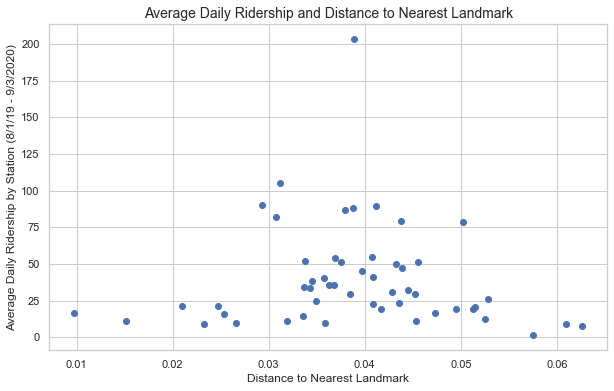

In [301]:
# Re-creating the visualization for relationship between distance to landmarks and average daily ridership
x = df.groupby(['station_id'])['dist_landmark'].median()
y = df.groupby(['station_id', 'date'])['rider'].sum().mean(level='station_id')

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x,y)
ax.set_title('Average Daily Ridership and Distance to Nearest Landmark', fontsize = 14)
ax.set_xlabel('Distance to Nearest Landmark')
ax.set_ylabel('Average Daily Ridership by Station (8/1/19 - 9/3/2020)')
plt.show()

[2073.5, 1987.7]


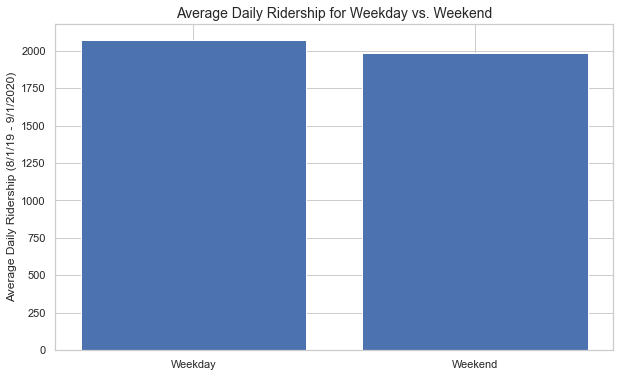

In [302]:
# Visualize Average Daily Ridership over the past year for weekdays vs. weekends
y = list(df.groupby(['weekend', 'date'])['rider'].sum().mean(level='weekend').apply(lambda x: round(x, 1)))
x = ['Weekday', 'Weekend']

fig, ax = plt.subplots(figsize=(10,6))
plt.bar(x,y)
ax.set_title('Average Daily Ridership for Weekday vs. Weekend', fontsize = 14)
ax.set_ylabel('Average Daily Ridership (8/1/19 - 9/1/2020)')

print(y)
plt.show()

In [303]:
list(df.groupby(['weekend', 'date'])['rider'].sum().loc[0,:])

[3627,
 3555,
 3437,
 3489,
 2387,
 3432,
 3351,
 3440,
 3215,
 3394,
 3512,
 3616,
 3115,
 3546,
 3225,
 3217,
 2903,
 3207,
 3392,
 3169,
 3621,
 3379,
 1480,
 3550,
 3766,
 3689,
 2473,
 3482,
 3461,
 3811,
 2928,
 3653,
 3370,
 3624,
 3600,
 3683,
 3589,
 3524,
 3810,
 3751,
 3649,
 3830,
 3296,
 3617,
 3370,
 1978,
 3287,
 3030,
 3216,
 2483,
 3454,
 3331,
 2970,
 3469,
 1956,
 2819,
 3152,
 3194,
 2521,
 3110,
 3286,
 3333,
 3126,
 2286,
 2947,
 2091,
 2848,
 2757,
 3052,
 2904,
 2247,
 2243,
 2673,
 1749,
 2018,
 2516,
 2593,
 1585,
 2434,
 2562,
 2565,
 2377,
 2525,
 2724,
 2337,
 736,
 1122,
 777,
 1567,
 1906,
 2030,
 2222,
 566,
 1718,
 1599,
 1795,
 1438,
 1888,
 768,
 1512,
 1176,
 1419,
 1672,
 1223,
 462,
 1178,
 1446,
 653,
 1418,
 735,
 1766,
 1535,
 1851,
 2080,
 1933,
 1937,
 2138,
 1871,
 1921,
 2223,
 2100,
 1494,
 1017,
 1658,
 1975,
 2085,
 2037,
 1751,
 2091,
 2031,
 1973,
 2035,
 2058,
 2217,
 2095,
 1361,
 1436,
 1251,
 1566,
 2093,
 1619,
 1704,
 1537,
 1762,

In [304]:
from scipy import stats

# Are these statistically different?
# H0: m1 = m2
# H1: m1 != m2
# 2 sample 2-tailed t-test 

t_stat, p_value = stats.ttest_ind(list(df.groupby(['weekend', 'date'])['rider'].sum().loc[0,:]),
               list(df.groupby(['weekend', 'date'])['rider'].sum().loc[1,:]))
print('t_stat: %.3f  p_value: %.3f'%(t_stat, p_value))

t_stat: 0.802  p_value: 0.423


In [305]:
df.groupby(['day', 'date'])['rider'].sum().mean(level='day').apply(lambda x: round(x, 1))

day
Friday       2094.0
Monday       1996.0
Saturday     2083.8
Sunday       1891.5
Thursday     2090.9
Tuesday      2092.6
Wednesday    2094.2
Name: rider, dtype: float64

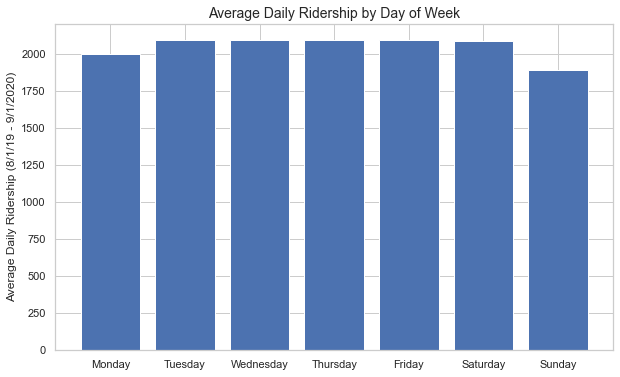

In [306]:
# Visualization for average daily ridership by day of the week
y = [1996.0, 2092.6, 2094.2, 2090.9, 2094.0, 2083.8, 1891.5]
x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(10,6))
plt.bar(x,y)
ax.set_title('Average Daily Ridership by Day of Week', fontsize = 14)
ax.set_ylabel('Average Daily Ridership (8/1/19 - 9/1/2020)')

plt.show()

In [308]:
df.TAVG.isna().sum()

19062

In [285]:
df.groupby(['date']).TAVG.median()['2020-01-02']

40.0

In [256]:
df.TAVG = df.TAVG.apply(lambda x: 40.0 if (x==np.nan and df.date=='2020-01-01') else x)
df.TAVG = df.TAVG.apply(lambda x: 79.0 if (x==np.nan and df.date=='2020-07-29') else x)
df.TAVG = df.TAVG.apply(lambda x: 79.0 if (x==np.nan and df.date=='2020-07-30') else x)
df.TAVG = df.TAVG.apply(lambda x: 80.0 if (x==np.nan and df.date=='2020-07-31') else x)
df.TAVG = df.TAVG.apply(lambda x: 79.0 if (x==np.nan and df.date=='2020-08-01') else x)
df.TAVG = df.TAVG.apply(lambda x: 77.0 if (x==np.nan and df.date=='2020-08-02') else x)
df.TAVG = df.TAVG.apply(lambda x: 76.0 if (x==np.nan and df.date=='2020-08-03') else x)
df.TAVG = df.TAVG.apply(lambda x: 78.0 if (x==np.nan and df.date=='2020-08-04') else x)
df.TAVG = df.TAVG.apply(lambda x: 72.0 if (x==np.nan and df.date=='2020-09-01') else x)


In [309]:
df.TAVG.fillna(method='bfill', inplace=True)

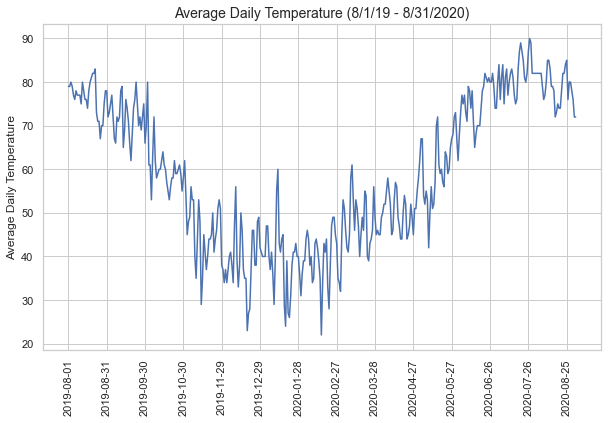

In [310]:
# Temperature over time
y = df.groupby(['date']).TAVG.median()
x = y.index

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x,y)
ax.set_title('Average Daily Temperature (8/1/19 - 8/31/2020)', fontsize = 14)
ax.set_ylabel('Average Daily Temperature')
plt.xticks(np.arange(0,400,30), rotation=90)

plt.show()

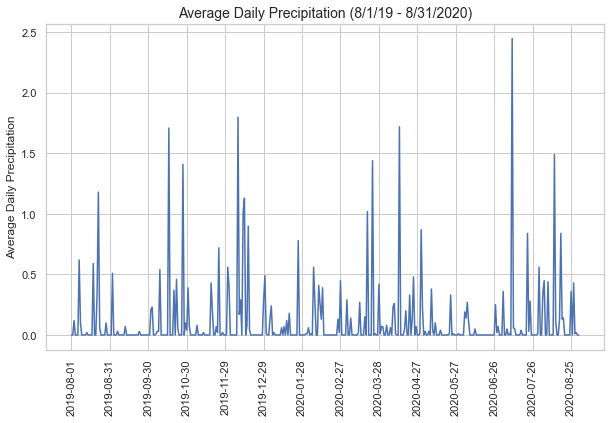

In [311]:
# Precipitation over time
y = df.groupby(['date']).PRCP.median()
x = y.index

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x,y)
ax.set_title('Average Daily Precipitation (8/1/19 - 8/31/2020)', fontsize = 14)
ax.set_ylabel('Average Daily Precipitation')
plt.xticks(np.arange(0,400,30), rotation=90)

plt.show()

In [312]:
df.to_csv('citi_bike_nj_clean.csv')